In [108]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import math
import datetime as dt
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [109]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

In [110]:
#Set Duration
start = dt.datetime(2018,6,26)
end = dt.datetime.now()

In [111]:
crypto_currency='DOGE'
against_currency='USD'

In [112]:
df = data.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-06-24,0.002576,0.002392,0.002490,0.002485,5693670.0,0.002485
2018-06-25,0.002577,0.002457,0.002501,0.002478,4070170.0,0.002478
2018-06-26,0.002508,0.002335,0.002484,0.002437,5765380.0,0.002437
2018-06-27,0.002504,0.002333,0.002406,0.002357,3678050.0,0.002357
2018-06-28,0.002492,0.002293,0.002409,0.002427,3832380.0,0.002427


In [113]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-22,0.247110,0.180979,0.190671,0.232174,5.098675e+09,0.232174
2021-06-23,0.268690,0.222527,0.234970,0.262782,3.844648e+09,0.262782
2021-06-24,0.289145,0.230006,0.263480,0.239153,5.542163e+09,0.239153
2021-06-25,0.255127,0.230972,0.237673,0.244784,2.649457e+09,0.244784
2021-06-27,0.252857,0.245393,0.245393,0.248807,2.564873e+09,0.248807


In [114]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1095.000000,1095.000000,1095.000000,1095.000000,1.095000e+03,1095.000000
mean,0.033807,0.027733,0.030732,0.030958,1.059689e+09,0.030958
std,0.104438,0.083166,0.093837,0.094182,4.369829e+09,0.094182
min,0.001612,0.001247,0.001540,0.001537,2.134170e+06,0.001537
25%,0.002451,0.002323,0.002392,0.002392,2.274852e+07,0.002392
50%,0.002802,0.002645,0.002713,0.002720,6.410806e+07,0.002720
75%,0.003770,0.003470,0.003612,0.003626,1.698199e+08,0.003626
max,0.737567,0.608168,0.687801,0.684777,6.941068e+10,0.684777


In [115]:
len(df)

1095

In [116]:
#Exploratory Data Analysis
#Maximum Closing Price
df.xs(key='Close',axis=1).max() # getting the maximum close value

0.684777021408081

In [117]:
#Visualization (Closing Price)
df.xs(key='Close',axis=1).iplot()

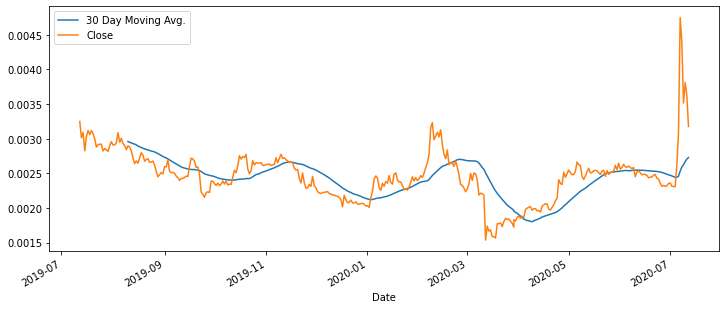

In [118]:
# 30 day moving Average for Close Price
plt.figure(figsize=(12,5))
df['Close'].loc['2019-07-12':'2020-07-12'].rolling(window=30).mean().plot(label='30 Day Moving Avg.')
df['Close'].loc['2019-07-12':'2020-07-12'].plot(label='Close')
plt.legend()

In [119]:
#Candle stick Graph
df0 = df[['Open','High','Low','Close']].loc['2019-07-12':'2020-07-12']
df0.iplot(kind='candle')

In [120]:
#Visualization of Simple Moving Average
df['Close'].loc['2019-07-10':'2020-07-10'].ta_plot(study='sma',periods=[9,18,27])

In [121]:
df['Close']

Date
2018-06-24    0.002485
2018-06-25    0.002478
2018-06-26    0.002437
2018-06-27    0.002357
2018-06-28    0.002427
                ...   
2021-06-22    0.232174
2021-06-23    0.262782
2021-06-24    0.239153
2021-06-25    0.244784
2021-06-27    0.248807
Name: Close, Length: 1095, dtype: float64

In [122]:
#Resetting the index to Closing Price
df1=df.reset_index()['Close']

In [123]:
df1

0       0.002485
1       0.002478
2       0.002437
3       0.002357
4       0.002427
          ...   
1090    0.232174
1091    0.262782
1092    0.239153
1093    0.244784
1094    0.248807
Name: Close, Length: 1095, dtype: float64

In [124]:
#Scaling the data using Minmax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [125]:
print(df1)

[[0.00138751]
 [0.00137726]
 [0.00131725]
 ...
 [0.34777822]
 [0.35601983]
 [0.36190789]]


In [126]:
df1.shape

(1095, 1)

In [127]:
#number of days we are going to predict
pred_days=30

In [128]:
#Splitting the close column of the dataset into x_train and y_train for training the model
x_train, y_train = [], []
for x in range(pred_days,len(df1)):
    x_train.append(df1[x-pred_days:x, 0])
    y_train.append(df1[x, 0])

In [129]:
len(x_train), len(y_train)

(1065, 1065)

In [130]:
#Conversion of list into arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [131]:
x_train

array([[0.00138751, 0.00137726, 0.00131725, ..., 0.0028116 , 0.00277209,
        0.00304871],
       [0.00137726, 0.00131725, 0.00120016, ..., 0.00277209, 0.00304871,
        0.00293601],
       [0.00131725, 0.00120016, 0.00130262, ..., 0.00304871, 0.00293601,
        0.00271647],
       ...,
       [0.51542064, 0.48505354, 0.45323457, ..., 0.27734616, 0.33756365,
        0.38236198],
       [0.48505354, 0.45323457, 0.44138662, ..., 0.33756365, 0.38236198,
        0.34777822],
       [0.45323457, 0.44138662, 0.44008987, ..., 0.38236198, 0.34777822,
        0.35601983]])

In [132]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [133]:
x_train

array([[[0.00138751],
        [0.00137726],
        [0.00131725],
        ...,
        [0.0028116 ],
        [0.00277209],
        [0.00304871]],

       [[0.00137726],
        [0.00131725],
        [0.00120016],
        ...,
        [0.00277209],
        [0.00304871],
        [0.00293601]],

       [[0.00131725],
        [0.00120016],
        [0.00130262],
        ...,
        [0.00304871],
        [0.00293601],
        [0.00271647]],

       ...,

       [[0.51542064],
        [0.48505354],
        [0.45323457],
        ...,
        [0.27734616],
        [0.33756365],
        [0.38236198]],

       [[0.48505354],
        [0.45323457],
        [0.44138662],
        ...,
        [0.33756365],
        [0.38236198],
        [0.34777822]],

       [[0.45323457],
        [0.44138662],
        [0.44008987],
        ...,
        [0.38236198],
        [0.34777822],
        [0.35601983]]])

In [134]:
x_train.shape, y_train.shape

((1065, 30, 1), (1065, 30, 1))

In [135]:
#Importing the required modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM

In [136]:
#Stacked LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
##Fitting the model by giving the data 30 times to the model
history=model.fit(x_train, y_train, epochs=30, batch_size=32,verbose=1)

Epoch 1/30
34/34 [==============================] - 10s 32ms/step - loss: 0.0061
Epoch 2/30
34/34 [==============================] - 1s 31ms/step - loss: 0.0024
Epoch 3/30
34/34 [==============================] - 1s 32ms/step - loss: 0.0021
Epoch 4/30
34/34 [==============================] - 1s 33ms/step - loss: 0.0021
Epoch 5/30
34/34 [==============================] - 1s 33ms/step - loss: 0.0022
Epoch 6/30
34/34 [==============================] - 1s 32ms/step - loss: 0.0020
Epoch 7/30
34/34 [==============================] - 1s 31ms/step - loss: 0.0021
Epoch 8/30
34/34 [==============================] - 1s 34ms/step - loss: 0.0022
Epoch 9/30
34/34 [==============================] - 1s 36ms/step - loss: 0.0021
Epoch 10/30
34/34 [==============================] - 1s 33ms/step - loss: 0.0020
Epoch 11/30
34/34 [==============================] - 1s 35ms/step - loss: 0.0020
Epoch 12/30
34/34 [==============================] - 1s 34ms/step - loss: 0.0021
Epoch 13/30
34/34 [=================

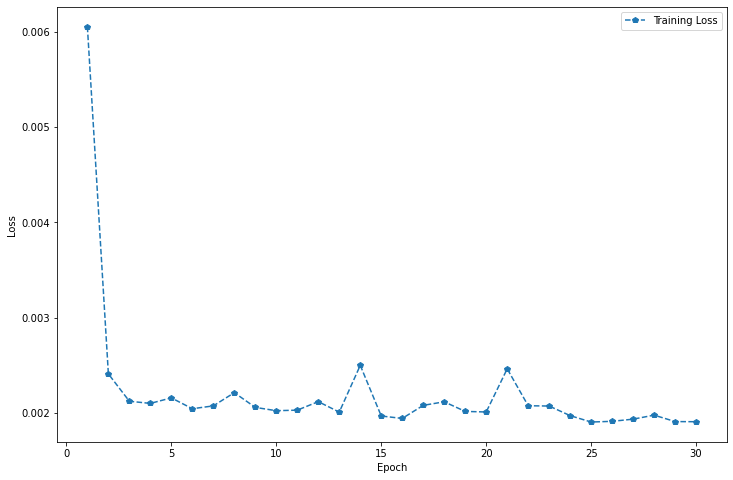

In [138]:
#Variation in loss as the epoches increase
loss = history.history['loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'p--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [139]:
#Getting the test dataset
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

test_data = data.DataReader(f"{crypto_currency}-{against_currency}", "yahoo", test_start, test_end)

In [140]:
test_data.index = pd.to_datetime(test_data.index)

In [141]:
test_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,0.004743,0.004553,0.004636,0.004682,85498337,0.004682
2021-01-01,0.005685,0.004615,0.004681,0.005685,228961515,0.005685
2021-01-02,0.013698,0.005584,0.005686,0.010615,3421562680,0.010615
2021-01-03,0.013867,0.009409,0.010602,0.009771,2707003608,0.009771
2021-01-04,0.011421,0.007878,0.009785,0.009767,1372398979,0.009767
...,...,...,...,...,...,...
2021-06-22,0.247110,0.180979,0.190671,0.232174,5098674891,0.232174
2021-06-23,0.268690,0.222527,0.234970,0.262782,3844648059,0.262782
2021-06-24,0.289145,0.230006,0.263480,0.239153,5542163262,0.239153


In [142]:
test_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,179.000000,179.000000,179.000000,179.000000,1.790000e+02,179.000000
mean,0.191883,0.155588,0.173509,0.174879,6.111871e+09,0.174879
std,0.192339,0.151179,0.172074,0.172081,9.308327e+09,0.172081
min,0.004743,0.004553,0.004636,0.004682,8.549834e+07,0.004682
25%,0.053106,0.048091,0.050389,0.050536,1.089046e+09,0.050536
50%,0.065068,0.058094,0.061968,0.061986,2.687720e+09,0.061986
75%,0.340596,0.296475,0.319635,0.319988,6.797494e+09,0.319988
max,0.737567,0.608168,0.687801,0.684777,6.941068e+10,0.684777


In [143]:
test_data.shape

(179, 6)

In [144]:
#Close values of the test data
actual_prices=test_data['Close']

In [145]:
actual_prices = np.array(actual_prices)
actual_prices

array([0.004682  , 0.005685  , 0.010615  , 0.009771  , 0.009767  ,
       0.00992   , 0.010465  , 0.009742  , 0.009846  , 0.010194  ,
       0.00986   , 0.008835  , 0.008063  , 0.008616  , 0.009397  ,
       0.009369  , 0.009265  , 0.009067  , 0.009171  , 0.009098  ,
       0.00906   , 0.008166  , 0.008524  , 0.008579  , 0.008727  ,
       0.008383  , 0.008255  , 0.007482  , 0.012555  , 0.047162  ,
       0.028176  , 0.037196  , 0.034875  , 0.03152   , 0.03712   ,
       0.053289  , 0.046935  , 0.057595  , 0.078782  , 0.078825  ,
       0.07007   , 0.072896  , 0.069676  , 0.070069  , 0.06645   ,
       0.062537  , 0.056591  , 0.05352   , 0.049376  , 0.059541  ,
       0.055139  , 0.054384  , 0.05598   , 0.053725  , 0.047392  ,
       0.056555  , 0.050167  , 0.05048   , 0.050083  , 0.048052  ,
       0.050599  , 0.050262  , 0.050592  , 0.050048  , 0.049609  ,
       0.050984  , 0.052122  , 0.061949  , 0.057998  , 0.056004  ,
       0.055918  , 0.055349  , 0.062432  , 0.058592  , 0.05708

In [146]:
len(actual_prices)

179

In [147]:
#concatenation of close values of the entire data with  close values of the test data  
total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)
total_dataset

Date
2018-06-24    0.002485
2018-06-25    0.002478
2018-06-26    0.002437
2018-06-27    0.002357
2018-06-28    0.002427
                ...   
2021-06-22    0.232174
2021-06-23    0.262782
2021-06-24    0.239153
2021-06-25    0.244784
2021-06-27    0.248266
Name: Close, Length: 1274, dtype: float64

In [148]:
total_dataset.index = pd.to_datetime(total_dataset.index)

In [149]:
len(total_dataset)

1274

In [150]:
#Input for Prediction
model_input=total_dataset[len(total_dataset)-len(test_data)-pred_days:]#[1272-178-30:]

In [151]:
model_input

Date
2021-05-28    0.303110
2021-05-29    0.302224
2021-05-30    0.325810
2021-05-31    0.370077
2021-06-01    0.423374
                ...   
2021-06-22    0.232174
2021-06-23    0.262782
2021-06-24    0.239153
2021-06-25    0.244784
2021-06-27    0.248266
Name: Close, Length: 209, dtype: float64

In [152]:
model_input=total_dataset[len(total_dataset)-len(test_data)-pred_days:].values #[1272-178-30:]

In [153]:
model_input=model_input.reshape(-1,1)
model_input=scaler.transform(model_input)

In [154]:
#Input for Prediction
model_input

array([[0.44138662],
       [0.44008987],
       [0.47461064],
       [0.53940051],
       [0.61740674],
       [0.58314206],
       [0.54854224],
       [0.54247408],
       [0.54193255],
       [0.48228002],
       [0.47735786],
       [0.50025467],
       [0.47540246],
       [0.46516889],
       [0.45452108],
       [0.47252063],
       [0.48379486],
       [0.47837362],
       [0.44819391],
       [0.44634241],
       [0.42728029],
       [0.41832882],
       [0.40887974],
       [0.25928516],
       [0.27734616],
       [0.33756365],
       [0.38236198],
       [0.34777822],
       [0.35601983],
       [0.36190789],
       [0.00460307],
       [0.00607107],
       [0.01328669],
       [0.0120514 ],
       [0.01204555],
       [0.01226948],
       [0.01306715],
       [0.01200896],
       [0.01216117],
       [0.01267051],
       [0.01218166],
       [0.01068146],
       [0.00955155],
       [0.01036093],
       [0.01150401],
       [0.01146303],
       [0.01131081],
       [0.011

In [155]:
model_input.shape

(209, 1)

In [156]:
#Converting input list into dataset matrix for Prediction and visualization
x_test = []

for x in range(pred_days, len(model_input)):#(30-209)
  x_test.append(model_input[x-pred_days:x, 0])
x_test

[array([0.44138662, 0.44008987, 0.47461064, 0.53940051, 0.61740674,
        0.58314206, 0.54854224, 0.54247408, 0.54193255, 0.48228002,
        0.47735786, 0.50025467, 0.47540246, 0.46516889, 0.45452108,
        0.47252063, 0.48379486, 0.47837362, 0.44819391, 0.44634241,
        0.42728029, 0.41832882, 0.40887974, 0.25928516, 0.27734616,
        0.33756365, 0.38236198, 0.34777822, 0.35601983, 0.36190789]),
 array([0.44008987, 0.47461064, 0.53940051, 0.61740674, 0.58314206,
        0.54854224, 0.54247408, 0.54193255, 0.48228002, 0.47735786,
        0.50025467, 0.47540246, 0.46516889, 0.45452108, 0.47252063,
        0.48379486, 0.47837362, 0.44819391, 0.44634241, 0.42728029,
        0.41832882, 0.40887974, 0.25928516, 0.27734616, 0.33756365,
        0.38236198, 0.34777822, 0.35601983, 0.36190789, 0.00460307]),
 array([0.47461064, 0.53940051, 0.61740674, 0.58314206, 0.54854224,
        0.54247408, 0.54193255, 0.48228002, 0.47735786, 0.50025467,
        0.47540246, 0.46516889, 0.45452108, 

In [157]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [158]:
x_test

array([[[0.44138662],
        [0.44008987],
        [0.47461064],
        ...,
        [0.34777822],
        [0.35601983],
        [0.36190789]],

       [[0.44008987],
        [0.47461064],
        [0.53940051],
        ...,
        [0.35601983],
        [0.36190789],
        [0.00460307]],

       [[0.47461064],
        [0.53940051],
        [0.61740674],
        ...,
        [0.36190789],
        [0.00460307],
        [0.00607107]],

       ...,

       [[0.51542064],
        [0.48505354],
        [0.45323457],
        ...,
        [0.27734616],
        [0.33756365],
        [0.38236198]],

       [[0.48505354],
        [0.45323457],
        [0.44138662],
        ...,
        [0.33756365],
        [0.38236198],
        [0.34777822]],

       [[0.45323457],
        [0.44138662],
        [0.44008987],
        ...,
        [0.38236198],
        [0.34777822],
        [0.35601983]]])

In [159]:
x_test.shape

(179, 30, 1)

In [160]:
#Prediction of x_test using LSTM sequential model
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

In [161]:
prediction_prices

array([[0.31109667],
       [0.30625346],
       [0.29987478],
       [0.29152372],
       [0.2809683 ],
       [0.26826477],
       [0.25502467],
       [0.24140479],
       [0.22720228],
       [0.21252331],
       [0.19827823],
       [0.18387909],
       [0.16912349],
       [0.1547893 ],
       [0.14079918],
       [0.12727691],
       [0.11396836],
       [0.10109264],
       [0.08895917],
       [0.07791599],
       [0.06762573],
       [0.05831132],
       [0.04983661],
       [0.04219477],
       [0.03678787],
       [0.03164987],
       [0.02639151],
       [0.02126184],
       [0.01704217],
       [0.01328339],
       [0.01020499],
       [0.01067722],
       [0.01134356],
       [0.01212724],
       [0.01304885],
       [0.01408896],
       [0.01532202],
       [0.01671572],
       [0.01831355],
       [0.02021621],
       [0.02243218],
       [0.024881  ],
       [0.02751279],
       [0.03024902],
       [0.03301952],
       [0.03575949],
       [0.03841672],
       [0.040

In [162]:
actual_prices

array([0.004682  , 0.005685  , 0.010615  , 0.009771  , 0.009767  ,
       0.00992   , 0.010465  , 0.009742  , 0.009846  , 0.010194  ,
       0.00986   , 0.008835  , 0.008063  , 0.008616  , 0.009397  ,
       0.009369  , 0.009265  , 0.009067  , 0.009171  , 0.009098  ,
       0.00906   , 0.008166  , 0.008524  , 0.008579  , 0.008727  ,
       0.008383  , 0.008255  , 0.007482  , 0.012555  , 0.047162  ,
       0.028176  , 0.037196  , 0.034875  , 0.03152   , 0.03712   ,
       0.053289  , 0.046935  , 0.057595  , 0.078782  , 0.078825  ,
       0.07007   , 0.072896  , 0.069676  , 0.070069  , 0.06645   ,
       0.062537  , 0.056591  , 0.05352   , 0.049376  , 0.059541  ,
       0.055139  , 0.054384  , 0.05598   , 0.053725  , 0.047392  ,
       0.056555  , 0.050167  , 0.05048   , 0.050083  , 0.048052  ,
       0.050599  , 0.050262  , 0.050592  , 0.050048  , 0.049609  ,
       0.050984  , 0.052122  , 0.061949  , 0.057998  , 0.056004  ,
       0.055918  , 0.055349  , 0.062432  , 0.058592  , 0.05708

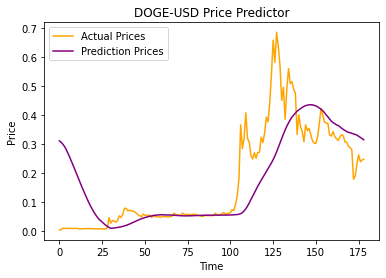

In [163]:
#Visualization of Prediction
plt.plot(actual_prices, color='orange', label='Actual Prices')
plt.plot(prediction_prices, color='purple', label='Prediction Prices')
plt.title(f"{crypto_currency}-{against_currency} Price Predictor")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="upper left")

In [ ]:
#Though initially there is a greater difference, from 25th to 100th day we dont have much difference.but after it there is found
#to ba larger difference as the actual prices are greater than the predicted ones  and after the 125 th day the prices 
#are more or less similar